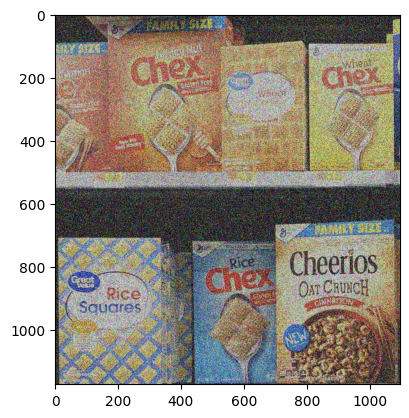

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

image=cv2.imread('dataset/scenes/scene4.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [162]:
channel1=image[:,:,0]
channel2=image[:,:,1]
channel3=image[:,:,2]

print(channel1[channel1>=225])
print(channel1[:10,:10])
# print(channel2[:10,:10])
# print(channel3[:10,:10])
# print(channel1[0,2],channel1[0][2])
print(channel1.shape,channel2.shape,channel3.shape)

[225 225 225 ... 225 225 225]
[[  0   0  31   0  22  61 225  91   0  76]
 [  0  70 111 117  53   0  35   0   0  62]
 [114   0   0   0 225   0   0   0   0 225]
 [  0   0   0   7   0 225   0   0   9   0]
 [225  47  84   0   0  16 225   0  71  57]
 [  0  54  56  15   0   0  65   0 115   0]
 [225   0  65   0  38  89   0   0   0   0]
 [ 12  27   2   0 225 225   0   0   0   0]
 [225  35   0   0   0  62 225  24  44 225]
 [103   4   0  65 225 225 225   0   0   0]]
(1174, 1096) (1174, 1096) (1174, 1096)


In [163]:
def window_elements(P, W, i, j):
    elements=P[max(0,i-(W-1)//2):min(P.shape[0]-1,i+(W-1)//2)+1,max(0,j-(W-1)//2):min(P.shape[1]-1,j+(W-1)//2)+1]
    return elements.reshape((np.prod(elements.shape),))


def uncorrupted(a):
    return a[(a > 0) & (a < 225)]


def find_median(a):
    return np.median(a)


def find_mean(a):
    return np.mean(a)


def only_0_and_225(a):
    for element in a:
        if element!=0 and element !=225:
            return False
    return True


def only_0(a):
    for element in a:
        if element!=0:
            return False
    return True


def only_225(a):
    for element in a:
        if element!=225:
            return False
    return True

In [164]:
def median_super_algo2(P):
    h=2
    Wmax=9
    width,height=P.shape
    for i in range(width):
        for j in range(height):
            W=3
            if P[i][j]>0 and P[i][j]<225:
                print('non corrotto')
                continue
            v=window_elements(P,W,i,j)
            V=uncorrupted(v)
            N=len(V)
            if N>=W:
                P[i][j]=find_median(V)
                print('n>=W')
            else:
                while W<=Wmax:
                    if W<Wmax:
                        if N<W: #case I
                            W+=h
                            print('1')
                        else: #case II
                            P[i][j]=find_median(V)
                            W=3
                            print('2')
                            break
                    else:
                        if W==Wmax:
                            if N<W and N!=0: #caseIII
                                P[i][j]=find_mean(V)
                                print('3')
                                break
                            else:
                                if only_0_and_225(v): #caseIV
                                    P[i][j]=find_mean(v)
                                    print('4')
                                    break
                                if only_0(v): #caseV
                                    P[i][j]=225
                                    print('5')
                                    break
                                if only_225(v): #caseVI
                                    P[i][j]=0
                                    print('6')
                                    break
    return P

In [165]:
def median_super_algo(P):
    h=2
    Wmax=9
    width,height=P.shape
    for i in range(width):
        for j in range(height):
            W=3
            if P[i][j]>0 and P[i][j]<225:
                # print('non corrotto')
                continue
            v=window_elements(P,W,i,j)
            V=uncorrupted(v)
            N=len(V)
            if N>=W:
                P[i][j]=find_median(V)
                # print('n>=W')
            else:
                while W<=Wmax:
                    if W<Wmax:
                        if N<W: #case I
                            W+=h
                            # print('1')
                        else: #case II
                            P[i][j]=find_median(V)
                            W=3
                            # print('2')
                            break
                    if W==Wmax:
                        if N<W and N!=0: #caseIII
                            P[i][j]=find_mean(V)
                            # print('3')
                            break
                        if only_0_and_225(v): #caseIV
                            P[i][j]=find_mean(v)
                            # print('4')
                            break
                        if only_0(v): #caseV
                            P[i][j]=225
                            # print('5')
                            break
                        if only_225(v): #caseVI
                            P[i][j]=0
                            # print('6')
                            break
    return P

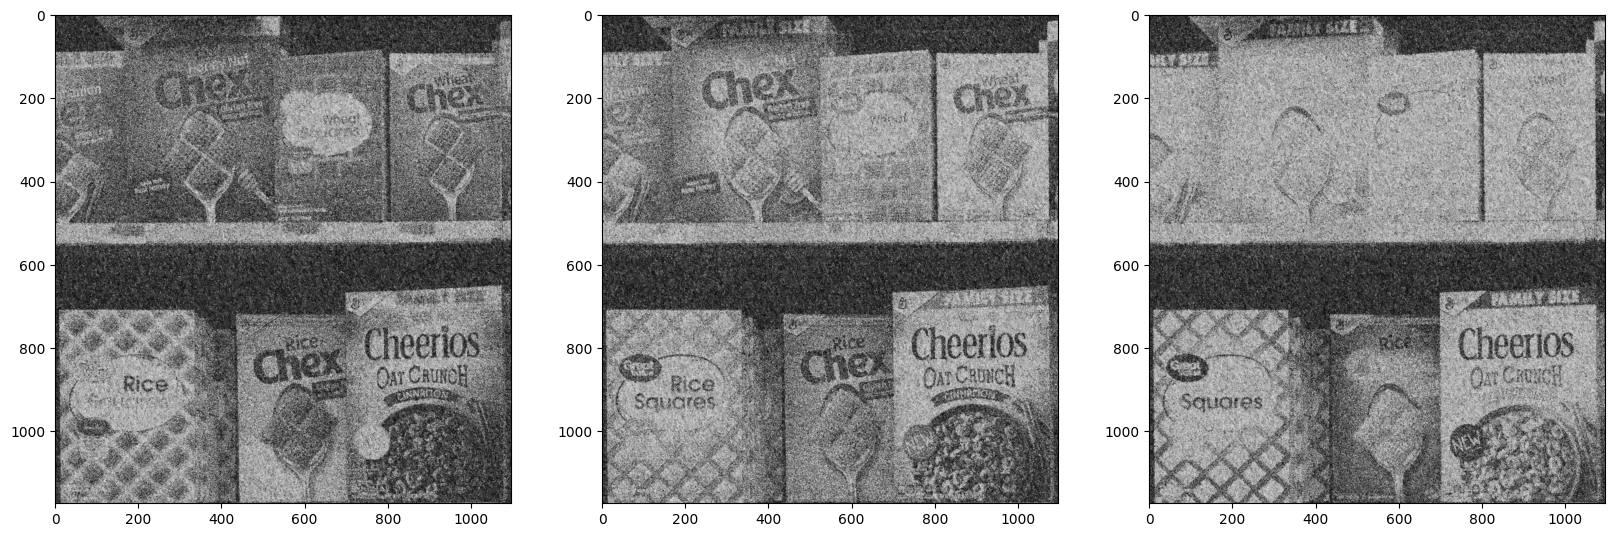

In [166]:
# plt.figure(figsize=(20,10))

# plt.subplot(131)
# img = cv2.imread('./dataset/scenes/scene4.png')
# plt.imshow(cv2.cvtColor(channel1, cv2.COLOR_BGR2RGB))

# plt.subplot(132)
# plt.imshow(cv2.cvtColor(channel2, cv2.COLOR_BGR2RGB))

# plt.subplot(133)
# plt.imshow(cv2.cvtColor(channel3 , cv2.COLOR_BGR2RGB))

channel1_=median_super_algo(channel1.copy())
channel2_=median_super_algo(channel2.copy())
channel3_=median_super_algo(channel3.copy())
channel1_=median_super_algo(channel1_)
channel2_=median_super_algo(channel2_)
channel3_=median_super_algo(channel3_)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(channel1_, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(channel2_, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(channel3_ , cv2.COLOR_BGR2RGB))


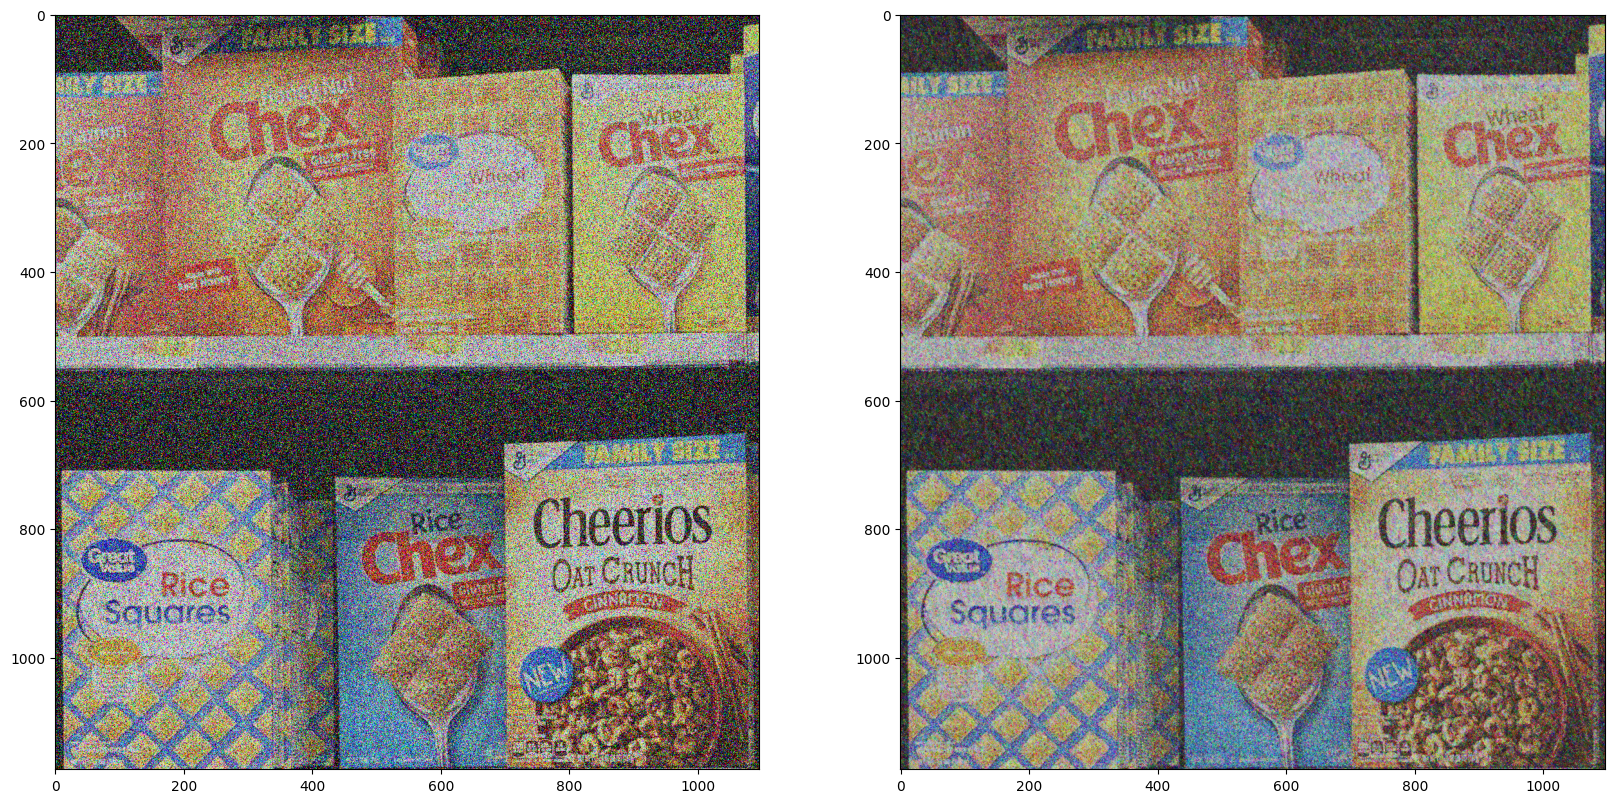

In [167]:

image2=image.copy()
image2[:,:,0]=channel1_
image2[:,:,1]=channel2_
image2[:,:,2]=channel3_

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv2.cvtColor(image2 , cv2.COLOR_BGR2RGB))

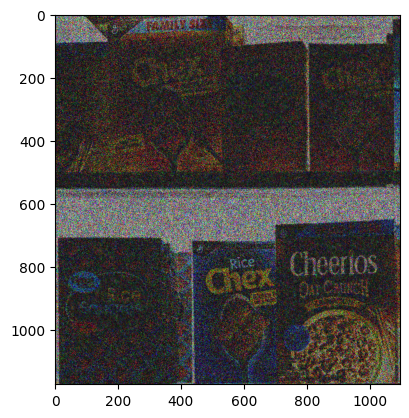

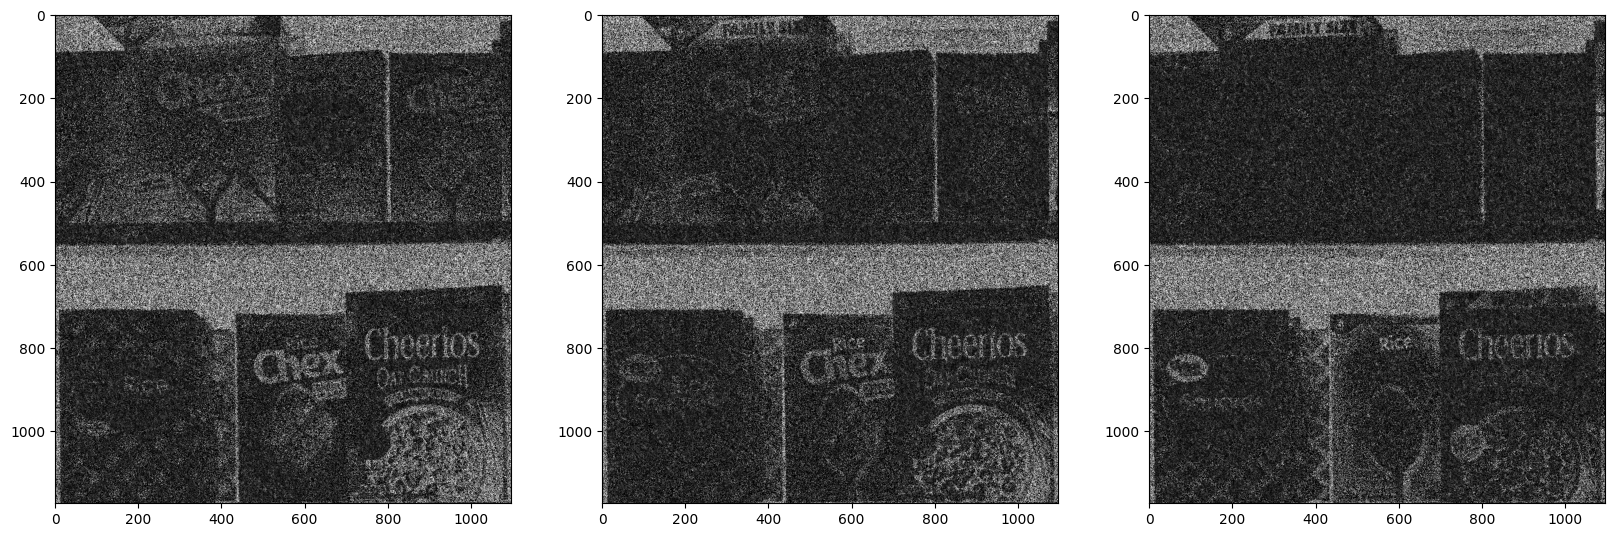

In [168]:
plt.imshow(image-image2)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(channel1-channel1_, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(channel2-channel2_, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(channel3-channel3_ , cv2.COLOR_BGR2RGB))
